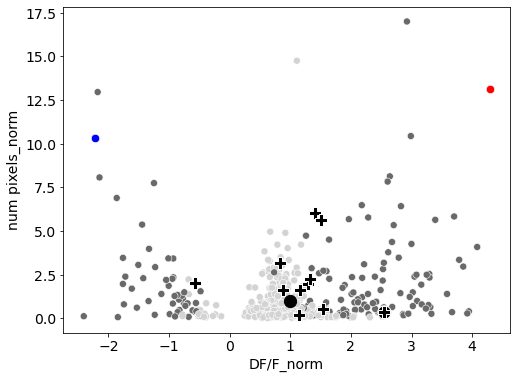

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import import_igaba_pkl

nAP='40'
singles_used_for_combos = ['F102G', 'F102Y',
              'S99A', 'S99G', 'S99C',
              'F104Y', 'F104H',
              'K253I', 'K253Y',
              'L178R', 'L178S',
              'R168P']
igabasnfr2 = 'S99A F102Y F104Y L178S'
igabasnfr2n = 'S99A F104H R168P'
f102g = 'F102G'

x_plot = 'DF/F_norm'
y_plot = 'num pixels_norm'# 'SNR_norm'
data = import_igaba_pkl(nAP, 'responsivepx-segmented-csvs') # 'ilastik-segmented-csvs' or 'responsivepx-segmented-csvs'

data_highlights_singles = data.loc[[ind for ind in data.index if ind in singles_used_for_combos]]
# data_highlights_combos = data.loc[[ind for ind in data.index if ind in highlights_combos]]
f,ax = plt.subplots(figsize=[8,6])

p=sns.color_palette()


# plot single and combo mutations
ax=sns.scatterplot(data=data, 
                   x=x_plot, y=y_plot, 
                   palette=['lightgray', 'dimgray'],
                   hue='is_combo_int',
                   s=50)

# marker for F102G
ax = sns.scatterplot(data=data.loc[[f102g]],
               x=x_plot, y=y_plot, 
               marker='o', 
               color = 'black',
               s=180)

# markers for mutants used to make combos
ax = sns.scatterplot(data=data_highlights_singles,
               x=x_plot, y=y_plot, 
               marker='P',
               color = 'black',
               s=150)

# marker for igabasnfr2
ax = sns.scatterplot(data=data.loc[[igabasnfr2]],
               x=x_plot, y=y_plot, 
               marker='o', 
               color = 'red',
               s=70)

# marker for igabasnfr2n
ax = sns.scatterplot(data=data.loc[[igabasnfr2n]],
               x=x_plot, y=y_plot, 
               marker='o', 
               color = 'blue',
               s=70)


# marker for igabasnfr
plt.scatter(1,1,marker='o', color='black', s=150)

ax.get_legend().remove()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_xlabel(x_plot, fontsize=14)
ax.set_ylabel(y_plot, fontsize=14)

f.savefig('figs/screening_scatter_{}_vs_{}.pdf'.format(x_plot.replace('/','_'),y_plot.replace('/','_')))

In [67]:
# stats
# data.sample(5)

singles_bool = data['is_combo_int'] == 0 # 1: combos, 0: singles
n_singles = (data['is_combo_int'] == 0).sum()
print('Num single mutants: {}'.format(n_singles))

# df/f > 1, pVal < 0.001
print('mutants with df/f > 1, pVal < 0.001: {}'.format(((data['DF/F_norm'] > 1) & 
                                                                      (data['DF/F_pval 2'] < 0.001) & 
                                                                      singles_bool).sum()))

# n responsive px norm > 1
print('mutants with n responsive px norm > 1 and df/f > 1: {}'.format(((data['DF/F_norm'] > 1) & 
                                                                        (data['DF/F_pval 2'] < 0.001) & 
                                                                        (data['num pixels_norm'] > 1) & 
                                                                        singles_bool).sum()))


# df/f < 0, pVal < 0.001
data_neg = data[((data['DF/F_norm'] < 0) & (data['DF/F_pval 2'] < 0.001) & singles_bool)]
print('mutants with df/f < 0, pVal < 0.001: {}'.format(data_neg.shape[0]))
print('R168P mutation:')
display(data[['DF/F_norm', 'num pixels_norm']].loc['R168P'])
display(data[['DF/F_norm', 'num pixels_norm']].loc['F102G'])
# df/f < -1, pVal < 0.001
print('mutants with df/f < 1, pVal < 0.001: {}'.format(((data['DF/F_norm'] < -1) & 
                                                                      (data['DF/F_pval 2'] < 0.001) & 
                                                                      singles_bool).sum()))

#  mutation with max # responsive pixels
print('mutant with max # responsive pixels')
data.loc[data[singles_bool]['num pixels_norm'].idxmax()][['DF/F_norm', 'num pixels_norm']]

Num single mutants: 327
mutants with df/f > 1, pVal < 0.001: 93
mutants with n responsive px norm > 1 and df/f > 1: 22
mutants with df/f < 0, pVal < 0.001: 20
R168P mutation:


DF/F_norm         -0.563802
num pixels_norm    2.014522
Name: R168P, dtype: float64

DF/F_norm          2.540931
num pixels_norm    0.346911
Name: F102G, dtype: float64

mutants with df/f < 1, pVal < 0.001: 0
mutant with max # responsive pixels


DF/F_norm           1.107891
num pixels_norm    14.752444
Name: L178Y, dtype: object

In [65]:
data.loc[data[singles_bool]['num pixels_norm'].idxmax()][['DF/F_norm', 'num pixels_norm']]

SNR_norm                                                    1.451734
SNR_pval_1                                                       0.0
SNR_pval_2                                                       0.0
SNR_unnorm                                                  1.615039
DF/F_norm                                                   1.107891
DF/F_pval_1                                                      0.0
DF/F_pval 2                                                      0.0
DF/F_unnorm                                                 0.202616
F0_norm                                                     1.908883
F0_pval_1                                                        0.0
F0_pval_2                                                        0.0
F0_unnorm                                                 319.750435
tau_on_norm                                                  1.31192
tau_on_pval_1                                                    1.0
tau_on_pval_2                     

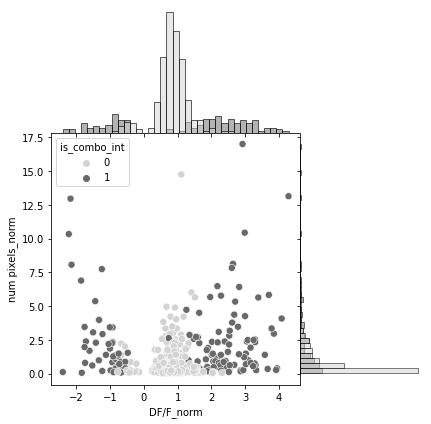

In [11]:
'''
joint grid plot for scatterplot
'''
g = sns.JointGrid(data=data,
             x=x_plot, y=y_plot,
             palette=['lightgray', 'dimgray'],
                   hue='is_combo_int', 
                  ratio = 2,
                 space=0)
g.plot_joint(sns.scatterplot,s=50)
g.plot_marginals(sns.histplot, kde=False)